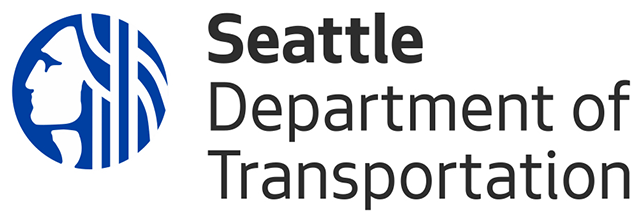

# Applied Data Science Capstone: Lowering Accident Recurrence and Severity in Seattle, Washington

 *This Notebook will be mainly used for the IBM Data Science Capstone*

## 1. Introduction
This project aim is to analyze the historic data regarding accidents in order to identify how each possible factor has an effect on accident severity and use it to develop a model that would be able to predict accident severity according to the features used to train the model. These factors/features include road conditions, light conditions, weather conditions, whether the person or people involved were under the influence of alcohol and/or other drugs, whether the driver was speeding, whether the driver was not paying attention, collision address type(crossway, intersection etc…), whether or not the pedestrian right of way was granted or not and other less influential features. 

This project is destined to help the Seattle Department of Transportation in identifying certain patterns and features that lead to increased accident severity such as a dangerous crossway or certain weather conditions. After identifying these patterns or features that can have an effect on accident severity, transit authorities can draw out an action plan to accordingly address these issues to improve road safety for the public. It will help the Seattle Department of Transportation prevent accidents and lower accident severity, which in turn would lead to less fatalities which is the ultimate goal, improving road safety for the public.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
%%capture
! pip install seaborn
import seaborn as sns

In [3]:
#Click here and press Shift+Enter
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-10-15 17:31:36--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  30.4MB/s    in 2.3s    

2020-10-15 17:31:39 (30.4 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



## 2. Data Cleaning and Preparation
Now we'll start with cleaning up the data set and preparing it, so we can execute the analysis correctly. The first step is to get a general idea of how the data set is composed and properly identify missing values or possible errors in data registry. 

In [4]:
df = pd.read_csv('Data-Collisions.csv',low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
missing_data = df.isnull()

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

#### Now that we've identified the missing values in each column, we'll decide our action plan with each column.

### 2.1. Drop Columns
We'll drop the following columns considering they do not give us relevant information for the analysis or they possess too many missing values, making it impossible to use in a proper analysis:
1. STATUS
2. EXCEPTRSNCODE
3. EXCEPTRSNDESC
4. INCDATE
5. SEGLANEKEY
6. CROSSWALKKEY
7. INTKEY
8. SDOTCOLNUM
9. SEVERITYCODE.1
10. OBJECTID
11. INCKEY
12. COLDETKEY
14. REPORTNO

In [8]:
columns=['STATUS','EXCEPTRSNCODE','EXCEPTRSNDESC','INCDATE','SEGLANEKEY','CROSSWALKKEY','INTKEY','SDOTCOLNUM','SEVERITYCODE.1','OBJECTID','INCKEY','COLDETKEY','REPORTNO']
df.drop(columns, inplace=True, axis=1)
print(df.columns)

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'HITPARKEDCAR'],
      dtype='object')


### 2.2. Drop Rows
We'll DROP the rows which have missing values in the following columns which are essential for the analysis and the maps we'll build later on:
1. X
2. Y
3. WEATHER
4. ROADCOND
5. LIGHTCND

In [9]:
df.shape

(194673, 25)

In [10]:
df.dropna(subset=["X"], axis=0, inplace=True)
df.dropna(subset=["Y"], axis=0, inplace=True)
df.dropna(subset=["WEATHER"], axis=0, inplace=True)
df.dropna(subset=["ROADCOND"], axis=0, inplace=True)
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)
print(df.shape)

(184167, 25)


### 2.3. Replace Data
We'll replace the missing values in the following columns and replace the current values with integers, so we'll be able to apply the Logistic Regression Analysis:
1. INATTENTIONIND: Replace 'NaN' and 'N' with '0' which means No and replace 'Y' with '1' which means Yes.
2. UNDERINFL: Replace 'NaN' and 'N' with '0' which means No and replace 'Y' with '1' which means Yes.
3. PEDROWNOTGRNT: Replace 'NaN' and 'N' with '0' which means No and replace 'Y' with '1' which means Yes.
4. SPEEDING: Replace 'NaN' and 'N' with '0' which means No and replace 'Y' with '1' which means Yes.
5. HITPARKEDCAR: Replace 'N' with '0' which means No and 'Y' with '1' which means Yes.
6. ADDRTYPE: Replace 'Alley' with '0', 'Block' with '1' and 'Intersection' with '2'.

In [11]:
df['UNDERINFL'].value_counts()

N    97244
0    78064
Y     4980
1     3879
Name: UNDERINFL, dtype: int64

In [12]:
df["UNDERINFL"].replace("N", "0", inplace=True)
df["UNDERINFL"].replace("Y", "1", inplace=True)
df['UNDERINFL'].value_counts()

0    175308
1      8859
Name: UNDERINFL, dtype: int64

In [13]:
df["INATTENTIONIND"].replace(np.nan, "0", inplace=True)
df["INATTENTIONIND"].replace('N', "0", inplace=True)
df["INATTENTIONIND"].replace('Y', "1", inplace=True)
df["PEDROWNOTGRNT"].replace(np.nan, "0", inplace=True)
df["PEDROWNOTGRNT"].replace('N', "0", inplace=True)
df["PEDROWNOTGRNT"].replace('Y', "1", inplace=True)
df["SPEEDING"].replace(np.nan, "0", inplace=True)
df["SPEEDING"].replace('N', "0", inplace=True)
df["SPEEDING"].replace('Y', "1", inplace=True)
df["HITPARKEDCAR"].replace('N','0',inplace=True)
df["HITPARKEDCAR"].replace('Y','1',inplace=True)
df["ADDRTYPE"].replace('Alley','0',inplace=True)
df["ADDRTYPE"].replace('Block','1',inplace=True)
df["ADDRTYPE"].replace('Intersection','2',inplace=True)

print(df['INATTENTIONIND'].value_counts())
print(df['PEDROWNOTGRNT'].value_counts())
print(df['SPEEDING'].value_counts())
print(df['HITPARKEDCAR'].value_counts())
print(df['ADDRTYPE'].value_counts())

0    155068
1     29099
Name: INATTENTIONIND, dtype: int64
0    179524
1      4643
Name: PEDROWNOTGRNT, dtype: int64
0    175460
1      8707
Name: SPEEDING, dtype: int64
0    177537
1      6630
Name: HITPARKEDCAR, dtype: int64
1    121023
2     63144
Name: ADDRTYPE, dtype: int64


There are still some columns which we've not changed their values but are neccesary for predicting accident severity such as Weather, Road Conditions and Light Conditions, therefore we'll proceed with identifying the values in each column and assigning a numerical value to the current string value, which is necessary for the Logistic Regression Analysis we'll be developing.

In [14]:
print(df['WEATHER'].value_counts())
print(df['ROADCOND'].value_counts())
print(df['LIGHTCOND'].value_counts())

Clear                       108833
Raining                      31987
Overcast                     27105
Unknown                      13846
Snowing                        888
Other                          765
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64
Dry               121871
Wet                46009
Unknown            13795
Ice                 1174
Snow/Slush           984
Other                116
Standing Water       102
Sand/Mud/Dirt         63
Oil                   53
Name: ROADCOND, dtype: int64
Daylight                    113522
Dark - Street Lights On      47250
Unknown                      12416
Dusk                          5763
Dawn                          2422
Dark - No Street Lights       1450
Dark - Street Lights Off      1145
Other                          188
Dark - Unknown Lighting         11
Name: LIGHTCOND, d

In [15]:
df["WEATHER"].replace(['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'],['0','1','2','3','4','5','6','7','8','9','10'],inplace=True)
print(df['WEATHER'].value_counts())

0     108833
1      31987
2      27105
3      13846
4        888
5        765
6        553
7        112
8         49
9         24
10         5
Name: WEATHER, dtype: int64


In [16]:
df["ROADCOND"].replace(['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'],['0','1','2','3','4','5','6','7','8'],inplace=True)
print(df['ROADCOND'].value_counts())

0    121871
1     46009
2     13795
3      1174
4       984
5       116
6       102
7        63
8        53
Name: ROADCOND, dtype: int64


In [17]:
df["LIGHTCOND"].replace(['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'],['0','1','2','3','4','5','6','7','8'],inplace=True)
print(df['LIGHTCOND'].value_counts())

0    113522
1     47250
2     12416
3      5763
4      2422
5      1450
6      1145
7       188
8        11
Name: LIGHTCOND, dtype: int64


## 3. Rename Columns
We'll want to rename columns 'X' and 'Y' to LATITUDE and LONGITUDE respectively in order to avoid confusion when we're developing our machine learning algorithm, which in this case would be a type of Classification called Logistic Regression, since we're trying to predict a class of a data point.

In [18]:
df.rename(columns={'X': 'LATITUDE', 'Y': 'LONGITUDE'},inplace=True)
print(df.columns)

Index(['SEVERITYCODE', 'LATITUDE', 'LONGITUDE', 'ADDRTYPE', 'LOCATION',
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'HITPARKEDCAR'],
      dtype='object')


## 4. Convertir data types
Now we'll proceed to converting the columns to the correct data type in order to use them for the analysis we'll be doing further along this notebook. Let's first identify which columns are necessary for the analysis in order to convert them into numerical values, in which we assign a numerical value to each object value. 

In [19]:
df.dtypes

SEVERITYCODE        int64
LATITUDE          float64
LONGITUDE         float64
ADDRTYPE           object
LOCATION           object
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
HITPARKEDCAR       object
dtype: object

In [20]:
df[["ADDRTYPE","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","PEDROWNOTGRNT","SPEEDING","HITPARKEDCAR"]] = df[["ADDRTYPE","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","PEDROWNOTGRNT","SPEEDING","HITPARKEDCAR"]].astype("int64")
df.dtypes

SEVERITYCODE        int64
LATITUDE          float64
LONGITUDE         float64
ADDRTYPE            int64
LOCATION           object
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND      int64
UNDERINFL           int64
WEATHER             int64
ROADCOND            int64
LIGHTCOND           int64
PEDROWNOTGRNT       int64
SPEEDING            int64
ST_COLCODE         object
ST_COLDESC         object
HITPARKEDCAR        int64
dtype: object

## 5. Exploratory Data Analysis
Before starting our data analysis, we'd like to do Exploratory Data Analysis of the database we're dealing with, which will lead to a better understanding of the problem we're dealing it.

In [21]:
df.describe()

,SEVERITYCODE,LATITUDE,LONGITUDE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
count,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.00000
mean,1.304142,-122.330502,47.619544,1.342863,2.468048,0.038845,0.029745,1.973692,14.042109,0.158003,0.048103,0.759485,0.451297,0.622169,0.025211,0.047278,0.03600
std,0.460045,0.030018,0.056215,0.474667,1.358602,0.202556,0.171220,0.556182,6.704957,0.364745,0.213985,1.100638,0.747997,1.051514,0.156765,0.212233,0.18629
min,1.000000,-122.419091,47.495573,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,-122.348846,47.575884,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,-122.330168,47.615361,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2.000000,-122.311922,47.663835,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000
max,2.000000,-122.238949,47.734142,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.000000,1.000000,10.000000,8.000000,8.000000,1.000000,1.000000,1.00000


In [22]:
df.corr()

,SEVERITYCODE,LATITUDE,LONGITUDE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
SEVERITYCODE,1.000000,0.010230,0.018436,0.200647,0.127388,0.248415,0.216448,-0.085234,0.182866,0.043645,0.043001,-0.101372,-0.100507,-0.076548,0.208771,0.037363,-0.101465
LATITUDE,0.010230,1.000000,-0.160175,0.005191,0.012762,0.011408,-0.001923,-0.016030,0.011285,-0.015714,-0.031680,-0.009648,-0.003742,-0.013027,0.008424,-0.008365,-0.016366
LONGITUDE,0.018436,-0.160175,1.000000,0.034169,-0.014068,0.010422,0.026657,0.020603,-0.019648,0.008962,-0.007060,0.022373,0.013843,-0.000942,0.022242,-0.026947,-0.012252
ADDRTYPE,0.200647,0.005191,0.034169,1.000000,0.062338,0.145828,0.084369,-0.096171,-0.035163,-0.080256,-0.044179,-0.087345,-0.092413,-0.074763,0.157405,-0.056881,-0.130007
PERSONCOUNT,0.127388,0.012762,-0.014068,0.062338,1.000000,-0.026981,-0.042459,0.395165,-0.142426,0.071938,0.021676,-0.062257,-0.061785,-0.050332,-0.030597,-0.001663,-0.052737
PEDCOUNT,0.248415,0.011408,0.010422,0.145828,-0.026981,1.000000,-0.018442,-0.321520,0.270173,-0.006494,0.015393,-0.017423,-0.014714,0.001351,0.495497,-0.033374,-0.035477
PEDCYLCOUNT,0.216448,-0.001923,0.026657,0.084369,-0.042459,-0.018442,1.000000,-0.311260,0.397459,0.001866,-0.017711,-0.044472,-0.051055,-0.026517,0.323449,-0.020619,-0.030337
VEHCOUNT,-0.085234,-0.016030,0.020603,-0.096171,0.395165,-0.321520,-0.311260,1.000000,-0.468318,0.047979,-0.007936,-0.007391,-0.019832,-0.025064,-0.280795,-0.040662,0.069251
SDOT_COLCODE,0.182866,0.011285,-0.019648,-0.035163,-0.142426,0.270173,0.397459,-0.468318,1.000000,0.024880,0.105539,-0.090948,-0.072587,-0.009688,0.247608,0.137529,-0.095981
INATTENTIONIND,0.043645,-0.015714,0.008962,-0.080256,0.071938,-0.006494,0.001866,0.047979,0.024880,1.000000,-0.028158,-0.067361,-0.079137,-0.064834,-0.028926,-0.049924,0.014179


In [23]:
df.head()

,SEVERITYCODE,LATITUDE,LONGITUDE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,-122.323148,47.703140,2,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,...,0,0,2,1,0,0,0,10,Entering at angle,0
1,1,-122.347294,47.647172,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,...,0,0,1,1,1,0,0,11,From same direction - both going straight - bo...,0
2,1,-122.334540,47.607871,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,...,0,0,2,0,0,0,0,32,One parked--one moving,0
3,1,-122.334803,47.604803,1,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,...,0,0,0,0,0,0,0,23,From same direction - all others,0
4,2,-122.306426,47.545739,2,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,...,0,0,1,1,0,0,0,10,Entering at angle,0


## 6. Logistic Regression Classification
We'll now proceed with building the machine learning model using Logistic Regression model, since we're trying to predict a class, or in this case, accident severity in order to identify key factors behind it and act upon them, which would help lower accident recurrence and severity in the future.

In [24]:
severity_df = df[['SEVERITYCODE','LATITUDE','LONGITUDE','ADDRTYPE','SDOT_COLCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL','WEATHER', 'ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']]
severity_df['SEVERITYCODE'] = severity_df['SEVERITYCODE'].astype('int')
severity_df.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,SEVERITYCODE,LATITUDE,LONGITUDE,ADDRTYPE,SDOT_COLCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,-122.323148,47.703140,2,11,2,0,0,2,0,0,2,1,0,0,0,0
1,1,-122.347294,47.647172,1,16,2,0,0,2,0,0,1,1,1,0,0,0
2,1,-122.334540,47.607871,1,14,4,0,0,3,0,0,2,0,0,0,0,0
3,1,-122.334803,47.604803,1,11,3,0,0,3,0,0,0,0,0,0,0,0
4,2,-122.306426,47.545739,2,11,2,0,0,2,0,0,1,1,0,0,0,0


In [25]:
severity_df.shape

(184167, 17)

#### Let's define the X and Y for our dataset:

In [26]:
X = np.asarray(severity_df[['ADDRTYPE','LATITUDE','LONGITUDE','SDOT_COLCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL','WEATHER', 'ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','HITPARKEDCAR']])
X[0:5]

array([[   2.        , -122.3231484 ,   47.70314032,   11.        ,
           2.        ,    0.        ,    0.        ,    2.        ,
           0.        ,    0.        ,    2.        ,    1.        ,
           0.        ,    0.        ,    0.        ,    0.        ],
       [   1.        , -122.3472943 ,   47.64717249,   16.        ,
           2.        ,    0.        ,    0.        ,    2.        ,
           0.        ,    0.        ,    1.        ,    1.        ,
           1.        ,    0.        ,    0.        ,    0.        ],
       [   1.        , -122.33454   ,   47.60787143,   14.        ,
           4.        ,    0.        ,    0.        ,    3.        ,
           0.        ,    0.        ,    2.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ],
       [   1.        , -122.3348033 ,   47.60480289,   11.        ,
           3.        ,    0.        ,    0.        ,    3.        ,
           0.        ,    0.        ,    0.  

In [27]:
y = np.asarray(severity_df['SEVERITYCODE'])
y [0:5]

array([2, 1, 1, 1, 2])

In [28]:
# Normalize Data Set
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.38442015,  0.24496811,  1.48708375, -0.45371162, -0.34450791,
        -0.19177595, -0.17372292,  0.04730059, -0.43318952, -0.2247975 ,
         1.12709078,  0.73356477, -0.59169031, -0.16081927, -0.2227641 ,
        -0.19324681],
       [-0.72232407, -0.55942184,  0.49147384,  0.29200737, -0.34450791,
        -0.19177595, -0.17372292,  0.04730059, -0.43318952, -0.2247975 ,
         0.21852424,  0.73356477,  0.35932188, -0.16081927, -0.2227641 ,
        -0.19324681],
       [-0.72232407, -0.13452855, -0.20765144, -0.00628022,  1.12759705,
        -0.19177595, -0.17372292,  1.84527933, -0.43318952, -0.2247975 ,
         1.12709078, -0.60334183, -0.59169031, -0.16081927, -0.2227641 ,
        -0.19324681],
       [-0.72232407, -0.14330006, -0.26223759, -0.45371162,  0.39154457,
        -0.19177595, -0.17372292,  1.84527933, -0.43318952, -0.2247975 ,
        -0.69004229, -0.60334183, -0.59169031, -0.16081927, -0.2227641 ,
        -0.19324681],
       [ 1.38442015,  0.80204361, -1

### 6.1. Train/Test Dataset Split
Now we split our dataset into trainning set and test set that we'll use for the classification analysis to be done:

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (147333, 16) (147333,)
Test set: (36834, 16) (36834,)


### 6.2. Build LR Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [31]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 2])

In [32]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.66266076, 0.33733924],
       [0.79992528, 0.20007472],
       [0.90680949, 0.09319051],
       ...,
       [0.67897198, 0.32102802],
       [0.66397508, 0.33602492],
       [0.09371754, 0.90628246]])

### 6.2.1. Jaccard Similarity Score
we can define jaccard as the size of the intersection divided by the size of the union of two label sets. In esence, it defines the accuracy of the predicted labels vs the actual labels. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0. In this case, we have a score of 0.730 from which we can imply that 73% of the predicted labels are accurate.

In [33]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.730078480938244

### 6.3. Confusion Matrix
Another way of looking at accuracy of classifier is to look at confusion matrix.

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[24838   855]
 [ 8328  2813]]


Confusion matrix, without normalization
[[24838   855]
 [ 8328  2813]]


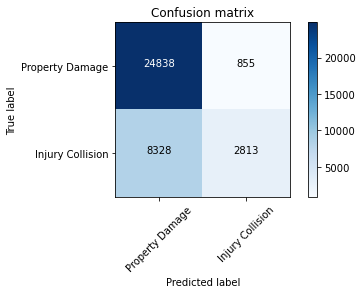

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage','Injury Collision'],normalize= False,  title='Confusion matrix')

The first row is for the Severity Code which value is coded to "Property Damage - Only Collision" whose actual value in test set is 1. As you can calculate, out of 36.834 accidents, the Severity Code of 25.693 of them is 1. And out of these 25.693, the classifier correctly predicted 96% of them as 1 and 4% incorrectly as 2. For the first row, the classifier showed promising results

Looking at the second row, the classifier correctly predicted 2.810 of them as 2, and 8.331 of them wrongly as 1, which means the classifier correctly predicted only 25% of the cases, which is not adequate. 

In conclusion, it has done a good job in predicting the customers with Severity Code of 1. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes. In specific case of binary classifier, such as this example, we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.

### 6.4. Classification Report
We now extract the classification Report which will give us the final verdict regarding the Logistic Regression Model. 

In [36]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.75      0.97      0.84     25693
           2       0.77      0.25      0.38     11141

    accuracy                           0.75     36834
   macro avg       0.76      0.61      0.61     36834
weighted avg       0.75      0.75      0.70     36834



The average accuracy of this classifier is 0.70, which means it will predict accident severity in 70% of the cases presented.

In [37]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5245068957947848

## 7. K Nearest Neighbor (KNN)

In [38]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
k = 7
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=7)

In [57]:
# Best k
Ks=20
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.68, 0.72, 0.7 , 0.73, 0.72, 0.74, 0.73, 0.74, 0.73, 0.74, 0.73,
       0.74, 0.74, 0.75, 0.74, 0.75, 0.74, 0.75, 0.74])

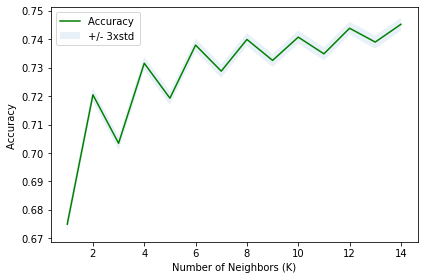

In [56]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [40]:
# Building the model again, using k=7
from sklearn.neighbors import KNeighborsClassifier
k = 14
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=14)

## 8. Decision Tree 

In [41]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
yhat = DT_model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 2])

# 8. Support Vector Machine

In [43]:
from sklearn import svm
SVM_model = svm.SVC(kernel='rbf')
SVM_model.fit(X_train, y_train) 

SVC()

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.74      0.99      0.85     25693
           2       0.89      0.19      0.32     11141

    accuracy                           0.75     36834
   macro avg       0.81      0.59      0.58     36834
weighted avg       0.78      0.75      0.69     36834

Confusion matrix, without normalization
[[25414   279]
 [ 8988  2153]]


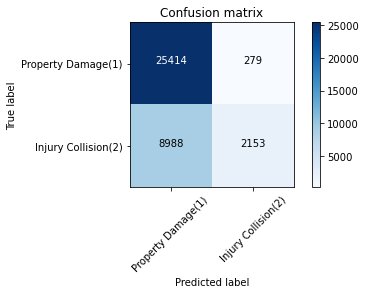

In [45]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage(1)','Injury Collision(2)'],normalize= False,  title='Confusion matrix')

In [48]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [49]:
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') ) 

KNN Jaccard index: 0.72
KNN F1-score: 0.71


In [50]:
DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT Jaccard index: 0.73
DT F1-score: 0.69


In [52]:
SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

SVM Jaccard index: 0.73
SVM F1-score: 0.71


In [55]:
LR_yhat = LR.predict(X_test)
LR_yhat_prob = LR.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.73
LR F1-score: 0.70
LR LogLoss: 0.52


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.72    | 0.71     | NA      |
| Decision Tree      | 0.73    | 0.69     | NA      |
| SVM                | 0.73    | 0.71     | NA      |
| LogisticRegression | 0.73    | 0.70     | 0.52    |